<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자
- 다중분류 딥러닝 모델링을 연습해보자

In [2]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩

In [3]:
# keras에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [4]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 훈련데이터 6만장, 테스트 데이터 1만장
# 28*28 픽셀
# 픽셀: 사진의 정보를 가지고있는 단위 (작은 사각형 하나가 1픽셀)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


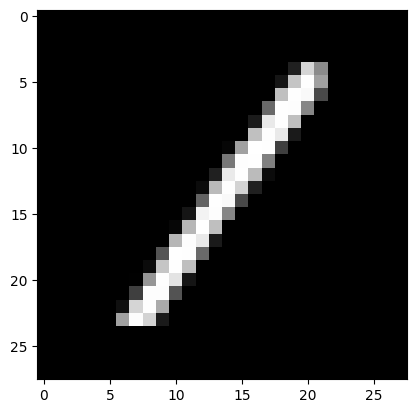

In [10]:
# 사진데이터 확인
plt.imshow(X_train[1003], cmap='gray')
# 흑백사진
# 0 ~ 255 검정색의 정도를 숫자로 가진다

In [9]:
# 정답데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss, optimizer 설정


In [12]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense: 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer: 입력층 설정
# Flatten: 2차원의 사진 데이터를 1차원으로 표현하기위한 클래스

In [13]:
# 1. 신경망 설계
# 뼈대
digit_model = Sequential()
# 입력층
digit_model.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터
# 중간층 (은닉층)
digit_model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경 (선형모델을 위한 작업)
digit_model.add(Dense(units = 16, activation = 'sigmoid'))
digit_model.add(Dense(units = 8, activation = 'sigmoid'))
# 출력층
digit_model.add(Dense(units = 10, activation = 'softmax'))
# 다중분류(softmax): 클래스의 개수만큼 선형모델이 필요하다
# 활성화함수: softmax (클래스개수만큼 확률값이 출력 -> 총합을 1로 만들어주는 함수)

##### 퍼셉트론: 선형모델 + 활성화함수

*활성화함수 (중간층, 출력층에서 사용)
- 중간층: 활성화/비활성화(역치)
   스텝펑션 -> 시그모이드
   (왜? 최적화알고리즘 경사하강법을 적용하기 위해서
   기울기와 역치개념을 가지는 시그모이드를 사용

- 출력층 : 최종 결과의 형태를 결정
(내가 출력하고자하는 형태에 따라 다르게 작성, units /activation)

[출력형태에 따른 unit 의 개수]
- 회귀: units = 1
- 이진분류: units = 1
- 다중분류: units = 클래스의 개수

[출력 형태에 따른 활성화함수의 종류]
- 회귀: linear (항등함수, y = x 선형모델이 예측한 데이터를 그대로 출력) 기본값,적어주지 않아도 괜찮다
- 이진분류: sigmoid (0~1 사이의 확률값을 출력)
- 다중분류: softmax (클래스의 개수만큼 확률값을 출력 -> 각각의 확률값의 총합이 1이 되도록 출력)

[정리]
#### 출력층에서 사용하는 unit 의 개수와 활성화 함수
- 회귀: units = 1, activation = 'linear' (default)
- 이진분류: units = 1, activation = 'sigmoid'
- 다중분류: units = 클래스의 개수, activation = 'softmax'

In [14]:
# 2. 모델학습 및 평가 방법 설정
digit_model.compile(loss = 'categorycal_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])
# loss: 오차 실제값과 예측값의 차이
# 회귀: mean_squared_error
# 이진분류: binary_crossentropy
# 다중분류: categorical_crossentropy

In [ ]:
# 3. 모델 학습 및 시각화


In [ ]:
# 4. 모델 예측 및 평가
